In [1]:
#! pip install plotly
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1.Data

### 1.1 Data Overview

In [2]:
raw_data = pd.read_csv("./Telco-Customer-Churn.csv")
raw_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1.2 Data Manipulation

In [5]:
data = raw_data.copy()
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})
data["TotalCharges"] = data["TotalCharges"].replace(" ",0)
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [6]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [7]:
data.describe(include="object")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7191-ADRGF,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
all_vars = data.columns.tolist()
num_vars =["tenure","MonthlyCharges","TotalCharges"]
def getRest(l1,l2):
    return [i for i in l1 if i not in l2]
cate_var = getRest(all_vars, num_vars)
print(num_vars)
print(cate_var)

['tenure', 'MonthlyCharges', 'TotalCharges']
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# 2. Exploratory Analysis

### 2.1 Balance

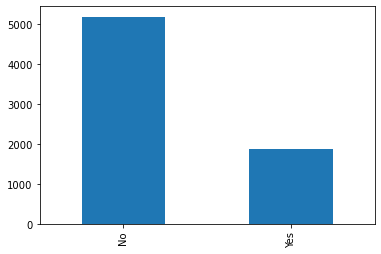

In [9]:
data.Churn.value_counts().plot(kind = "bar")

The samples are not balanced.Hence we will use ROC to evaluate the result.

### 2.2 Numercial Variable - Box Plot

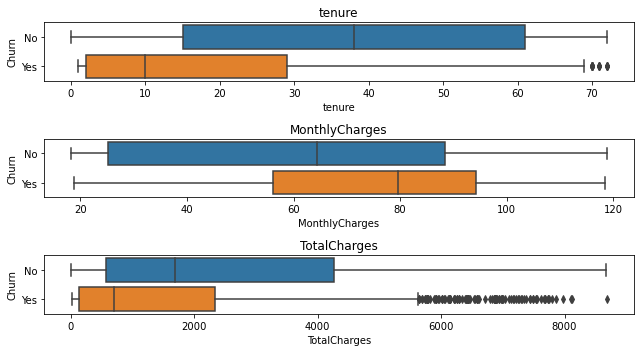

In [10]:
import seaborn as sns
fig,axes = plt.subplots(len(num_vars),1, figsize = (9,5))
axes= axes.flatten()
for index, var in enumerate(num_vars):    
    sns.boxplot(x = var, y = "Churn",data = data, ax = axes[index])
    axes[index].set_title(var)
plt.tight_layout()

A lot of outliers in TotalCharges
### 2.2 Categorical Variables 

In [11]:
label = data["Churn"].value_counts().keys().tolist()
value = data["Churn"].value_counts().values.tolist()
data1 = go.Pie(labels = label, values = value,textinfo='label+percent')
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
fig = go.Figure(data = data1,layout =layout)
py.iplot(fig)

In [12]:
churn = data.loc[data["Churn"] == "Yes",:]
not_churn = data.loc[data["Churn"] == "No",:]
print(churn.shape)
print(not_churn.shape)

(1869, 21)
(5174, 21)


In [13]:
trace0 = go.Scatter3d(x= churn["MonthlyCharges"],y= churn["TotalCharges"],z = churn["tenure"],
                      mode ="markers",
                      name = "Churn customers",
                      text = "ID:"+churn["customerID"],
                      marker = dict(size = 1, color = "red")
                     )
trace1= go.Scatter3d(x= not_churn["MonthlyCharges"], y = not_churn["TotalCharges"],z = churn["tenure"],
                     mode = "markers", name = "not_churn customers",
                     text = "ID"+not_churn["customerID"],
                     marker = dict(size = 1, color = "blue")
                    )
layout = go.Layout(dict(title="Monthly Charges & Total Charges & tenure in customer attrition",

                       scene = dict(camera = dict(up = dict(x=0,y=0,z=0),
                                                  center = dict(x=0,y=0,z=0),
                                                  eye = dict(x=1.25, y=1.25, z = 1.25)
                                                  ),
                                   xaxis = dict(title="Monthly Charges",
                                                gridcolor = "rgb(255,255,255)",
                                                zerolinecolor = "rgb(255, 255, 255)",
                                                showbackground = True,
                                                backgroundcolor='rgb(230, 230,230)'
                                                ),
                                   yaxis = dict(title = "Total Charges",
                                                gridcolor = "rgb(255,255,255)",
                                                zerolinecolor = "rgb(255,255,255)",
                                                showbackground =True,
                                                backgroundcolor='rgb(230, 230,230)'
                                                ),
                                   zaxis = dict(title = "Tenure",
                                                gridcolor = "rgb(255,255,255)",
                                                zerolinecolor = "rgb(255,255,255)",
                                                showbackground = True,
                                                backgroundcolor='rgb(230, 230,230)'
                                                )
                                   )
                       )
                  )
traces = [trace0, trace1]


fig = go.Figure(data = traces,layout=layout)
py.iplot(fig)

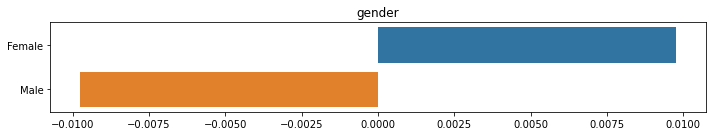

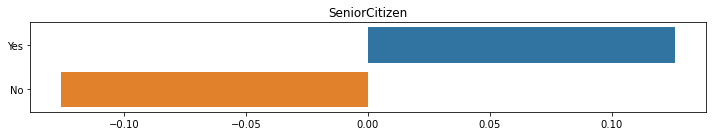

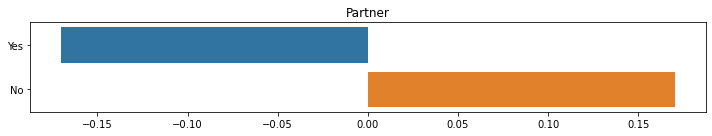

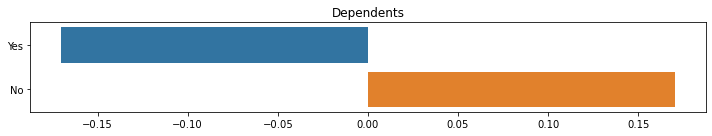

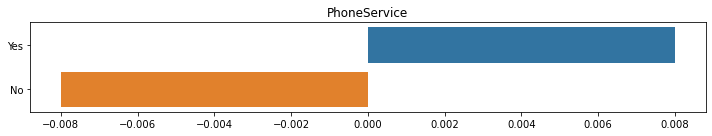

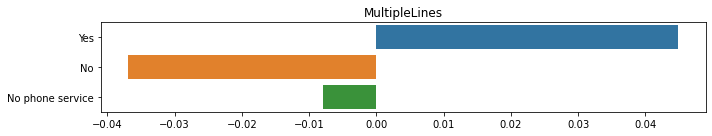

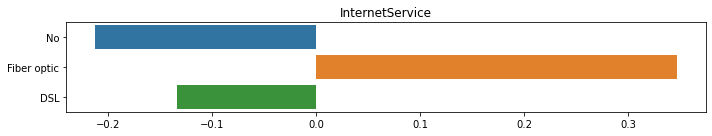

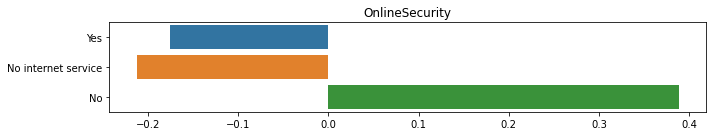

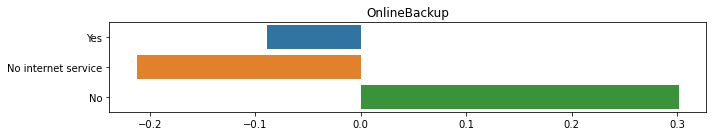

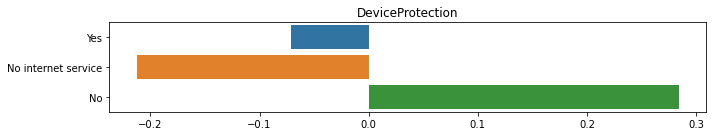

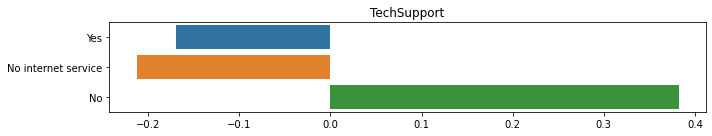

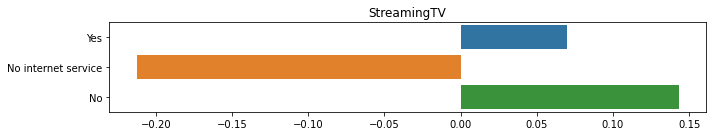

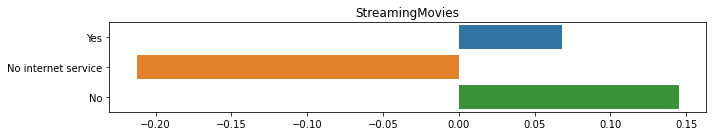

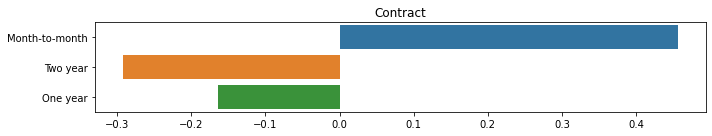

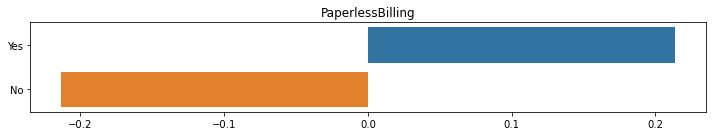

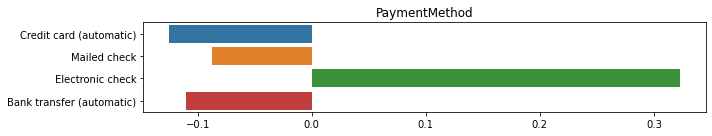

In [14]:
cate_var.remove("customerID")
cate_var.remove("Churn")
pos_counts = (data["Churn"] == "Yes").sum()
neg_counts = (data["Churn"] == "No").sum()

for var in cate_var:
    plt.figure(figsize=(10,2))
    pos_val_counts = data.loc[data["Churn"] == "Yes",var].value_counts().to_dict()
    neg_val_counts = data.loc[data["Churn"]=="No", var].value_counts().to_dict()
    all_keys = list(set(list(pos_val_counts.keys())+list(neg_val_counts.keys())))
    diff = [pos_val_counts.get(key,0)/pos_counts - neg_val_counts.get(key,0)/neg_counts for key in all_keys]
    sns.barplot(diff, all_keys)
    plt.title(var)
    plt.tight_layout()

# 3. Feature Engineering
### 3.1 Create dummy variables

In [15]:
from sklearn.model_selection import train_test_split
data = data.drop("customerID", axis = 1)
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

[Text(0.5, 1.0, 'Correlation Heatmap - Pearson')]

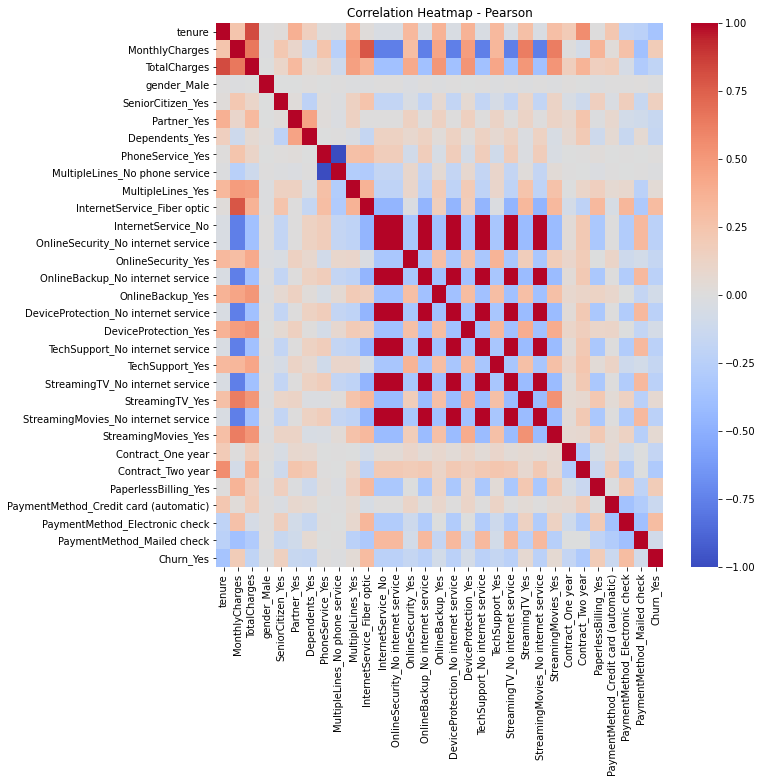

In [16]:
corr = data_dummy.corr(method ="pearson")
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=corr,cmap = "coolwarm")
ax.set(title = "Correlation Heatmap - Pearson")

### 3.2 Split train and test data 

In [17]:
train, test = train_test_split(data_dummy, test_size = 0.3, random_state = 666)
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 30) (4930,)
(2113, 30) (2113,)


### 3.3 Filtering - Variance Threshold

In [18]:
from sklearn.feature_selection import VarianceThreshold
threshold = 0.90
vt = VarianceThreshold()
vt.fit(X_train)
feat_vt =X_train.columns[vt.variances_ > threshold * (1-threshold)] 

In [19]:
feat_vt.shape

(28,)

### 3.4 Filtering - Chi-2 Testing

In [20]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X_train)
model = SelectKBest(score_func= chi2 ,k = "all")
X_train_scores = model.fit(X_train_scaled,y_train)
X_train_scores = pd.DataFrame({"Features":X_train.columns,"Feature Importance":X_train_scores.scores_}).sort_values("Feature Importance", ascending =False)
feat_imp_chi2 = X_train_scores["Features"][:15]
feat_imp_chi2

25                       Contract_Two year
28          PaymentMethod_Electronic check
10             InternetService_Fiber optic
18         TechSupport_No internet service
16    DeviceProtection_No internet service
14        OnlineBackup_No internet service
12      OnlineSecurity_No internet service
11                      InternetService_No
22     StreamingMovies_No internet service
20         StreamingTV_No internet service
0                                   tenure
24                       Contract_One year
4                        SeniorCitizen_Yes
13                      OnlineSecurity_Yes
19                         TechSupport_Yes
Name: Features, dtype: object

### 3.5 Recursive Feature Elimination (RFE)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = RFE(LogisticRegression(max_iter = 100000), n_features_to_select= 20)
model.fit(X_train,y_train)
rfe_score = pd.DataFrame({"Feature":X_train.columns,"Feature Importance":model.ranking_}).sort_values("Feature Importance", ascending =False)
feat_rfe_15 = rfe_score["Feature"][:15]
feat_rfe_15

2                              TotalCharges
1                            MonthlyCharges
29               PaymentMethod_Mailed check
8            MultipleLines_No phone service
0                                    tenure
21                          StreamingTV_Yes
9                         MultipleLines_Yes
17                     DeviceProtection_Yes
6                            Dependents_Yes
16     DeviceProtection_No internet service
19                          TechSupport_Yes
28           PaymentMethod_Electronic check
27    PaymentMethod_Credit card (automatic)
26                     PaperlessBilling_Yes
25                        Contract_Two year
Name: Feature, dtype: object

### 3.6 Feature Importance (RF)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
feat_imp = pd.DataFrame({"Feature":X_train.columns,"Feature Importance":model.feature_importances_})
feat_imp_15 = feat_imp.sort_values("Feature Importance",ascending =False)["Feature"][:15]
feat_imp_15

2                       TotalCharges
1                     MonthlyCharges
0                             tenure
10       InternetService_Fiber optic
28    PaymentMethod_Electronic check
25                 Contract_Two year
26              PaperlessBilling_Yes
3                        gender_Male
13                OnlineSecurity_Yes
19                   TechSupport_Yes
5                        Partner_Yes
24                 Contract_One year
4                  SeniorCitizen_Yes
15                  OnlineBackup_Yes
9                  MultipleLines_Yes
Name: Feature, dtype: object

### 3.7 Combine all features

In [23]:
all_feats = map(np.array,[feat_imp_15,feat_imp_chi2,feat_rfe_15,feat_vt])
all_feats = np.concatenate([i for i in all_feats])
all_feats = np.unique(all_feats)
all_feats.shape

(29,)

# 4. Model Selection
### 4.1 Model Spot Check

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier

In [25]:
clfs = dict(LogisticRegression = LogisticRegression(max_iter = 10000),
            LDA = LinearDiscriminantAnalysis(),
            DecisionTree = DecisionTreeClassifier(),
            KNN = KNeighborsClassifier(),
            SVM = SVC(probability = True),
            RamdonForest = RandomForestClassifier(),
            AdaBoost = AdaBoostClassifier(),
            GB = GradientBoostingClassifier(),
           )

In [26]:
from sklearn.model_selection import cross_val_score
scoring = "roc_auc"
for clf in clfs:
    score = cross_val_score(estimator= clfs[clf],X= X_train,y= y_train, cv= 5, scoring= scoring)
    print("{0} score: {1:.3f} +/-{2:.3f}".format(clf,np.average(score),np.std(score)))

LogisticRegression score: 0.840 +/-0.015
LDA score: nan +/-nan
DecisionTree score: 0.651 +/-0.019
KNN score: 0.742 +/-0.006
SVM score: 0.790 +/-0.010
RamdonForest score: 0.821 +/-0.015
AdaBoost score: 0.841 +/-0.015
GB score: 0.841 +/-0.013


Given the score we have here, we will go for LogisticRegression, RandomForest, AdaBoost. GraidentBoosting

### 4.2 Model Building and Tuning
#### 4.2.1 Logistic Regrssion

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics

In [33]:
def LR_model(X_train_cv,y_train_cv,X_val,y_val,C,penalty):
    scaler = StandardScaler().fit(X_train_cv)
    X_train_cv = scaler.transform(X_train_cv)
    X_val = scaler.transform(X_val)
    if penalty =="l2":
        clf = LogisticRegression(C=C, penalty=penalty, max_iter= 100000)
    else:
        clf = LogisticRegression(C=C, penalty=penalty, solver="liblinear")
    clf.fit(X_train_cv,y_train_cv)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:,1]
    acc = metrics.accuracy_score(y_val,y_val_pred)
    auc = metrics.roc_auc_score(y_val,y_val_proba)
    return acc, auc

In [34]:
def LR_cv(X_train, y_train, Cs, penalty = "l2", cv = 5):
    aucs = {}
    kf = KFold(n_splits = cv)
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:],y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx],y_train.iloc[val_idx]
        for C in Cs:   
            acc, auc = LR_model(X_train_cv,y_train_cv,X_val,y_val, C=C, penalty=penalty)
            if C in aucs:
                aucs[C].append(auc)
            else:
                aucs[C] = []
                aucs[C].append(auc)
    return aucs

In [35]:
Cs = np.logspace(-3,3,7)
auc_l1 = LR_cv(X_train,y_train,Cs = Cs,penalty="l1")
auc_l2 = LR_cv(X_train,y_train,Cs = Cs,penalty="l2")

In [36]:
def LR_get_mean_auc(aucs):
    mean_aucs = []
    best_mean_auc = 0
    best_C = None
    for C in aucs:
        mean_auc = np.mean(aucs[C])
        mean_aucs.append(mean_auc)
        if best_mean_auc < mean_auc:
            best_mean_auc = mean_auc
            best_C = C
    return best_C,best_mean_auc,mean_aucs
    
best_C_l1, best_mean_auc_l1, mean_aucs_l1 = LR_get_mean_auc(auc_l1)
best_C_l2, best_mean_auc_l2, mean_aucs_l2 = LR_get_mean_auc(auc_l2)
print("Best_C: {0:.0f}  Best_AUC_L1: {1:.4f}".format(best_C_l1,best_mean_auc_l1))
print("Best_C: {0:.0f}  Best_AUC_L2: {1:.4f}".format(best_C_l2,best_mean_auc_l2))

Best_C: 1  Best_AUC_L1: 0.8419
Best_C: 100  Best_AUC_L2: 0.8418


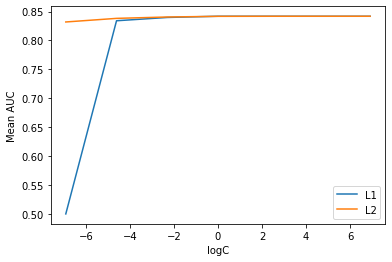

In [37]:
def LR_plot(Cs,mean_aucs,label):
    ax = sns.lineplot(np.log(Cs),mean_aucs, label = label)
    ax.set(xlabel = "logC",ylabel = "Mean AUC")
    plt.legend()
LR_plot(Cs, mean_aucs_l1, label = "L1")
LR_plot(Cs, mean_aucs_l2, label = "L2")

As we can see, both L1 and L2 have good mean AUC (L1 is slightly better than l2).The performance of L2 is not sensitive to the regularazation term. Here we go for L1,as it has the best AUC

In [38]:
# final Predict
clf = LogisticRegression(C=1,solver = "liblinear",penalty = "l1" )
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test, y_proba)
coef = clf.coef_ 
acc = metrics.accuracy_score(y_test,y_pred)
auc = metrics.roc_auc_score(y_test, y_proba)
cm = metrics.confusion_matrix(y_test,y_pred)
print("Accuacy:",acc)
print("AUC:",auc)

Accuacy: 0.8017037387600567
AUC: 0.8489494798395323


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')]

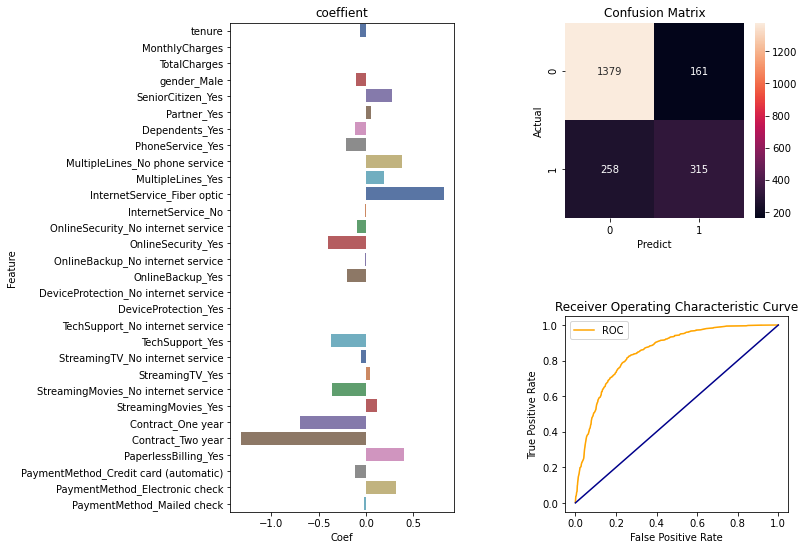

In [39]:
coef_df = pd.DataFrame({"Feature":X_train.columns,
                       "Coef":coef.ravel()}                       
                      )
fig = plt.figure(figsize = (10,9))
gs = plt.GridSpec(2,2,wspace = 0.5, hspace = 0.5)

ax1 = plt.subplot(gs[:,0])
sns.barplot(y = "Feature", x = "Coef", data = coef_df, palette ="deep")
ax1.set(title = "coeffient")

ax2 = plt.subplot(gs[0,1])
sns.heatmap(data = cm, annot = True, fmt = "d" )
ax2.set(xlabel = "Predict", ylabel = "Actual", title = "Confusion Matrix")

ax3 = plt.subplot(gs[1,1])
sns.lineplot(fpr,tpr,color='orange', label='ROC')
sns.lineplot([0,1],[0,1],color = "darkblue",linestyle="--")
ax3.set(title = "Receiver Operating Characteristic Curve",xlabel = "False Positive Rate",ylabel = "True Positive Rate")

### 4.2.2 Random Forest Classifier (RF)

In [36]:
def rf_model(X_train_cv,y_train_cv,X_val,y_val,n,depth):
    #scaler = StandardScaler().fit(X_train_cv)
    #X_train_cv = scaler.transform(X_train_cv)
    #X_val = scaler.transform(X_val)
    
    clf = RandomForestClassifier(n_estimators= n, max_depth= depth)
    clf.fit(X_train_cv,y_train_cv)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:,1]
    
    acc = metrics.accuracy_score(y_val,y_val_pred)
    auc = metrics.roc_auc_score(y_val, y_val_proba)
    
    return auc

In [37]:
def rf_cv(X_train,y_train, ns, depths,cv =5):
    aucs={}
    kf = KFold(n_splits = cv)
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx,:], y_train.iloc[val_idx]
        
        for n in ns:
            for depth in depths:    
                auc = rf_model(X_train_cv, y_train_cv, X_val, y_val,
                               n = n, depth = depth,
                              )
                key = str(n)+"&"+str(depth)
                if key in aucs:
                    aucs[key].append(auc)
                else:
                    aucs[key] = []
                    aucs[key].append(auc)
                    
    return aucs

In [38]:
ns = [50,100,150,200,250,300,350,400]
depths = [5,8,10,12,15]
aucs = rf_cv(X_train,y_train,ns=ns,depths = depths)

In [39]:
aucs

{'50&5': [0.8559106098579782,
  0.8320015854141894,
  0.8497062847026635,
  0.8278884023244925,
  0.8357779471465678],
 '50&8': [0.8597901002506265,
  0.8362557801558992,
  0.845465518628792,
  0.8253408245889449,
  0.8387280749508744],
 '50&10': [0.8550255847953216,
  0.8301704320253668,
  0.8404120061157158,
  0.8224599961442066,
  0.8344143555603947],
 '50&12': [0.8526289682539683,
  0.8262174659796538,
  0.8296531745393095,
  0.8156242253986615,
  0.8222223950475183],
 '50&15': [0.8421679197994988,
  0.8206526621746598,
  0.8197365950484162,
  0.8054724723897656,
  0.8169754190581369],
 '100&5': [0.8583072263993314,
  0.8363376932223544,
  0.8437595558059064,
  0.8294527527610235,
  0.8359542289485828],
 '100&8': [0.8613643483709273,
  0.8336292773153653,
  0.8433733000724231,
  0.8264094301688286,
  0.8387902920574678],
 '100&10': [0.8585970133667502,
  0.8343982031972519,
  0.8398648104932809,
  0.8236442755239748,
  0.8324804404971147],
 '100&12': [0.8515768588137009,
  0.830587

In [40]:
def rf_get_mean_auc(aucs):
    mean_aucs=[]
    best_mean_auc = float("-inf")
    best_key = ""
    for key in aucs:
        mean_auc = np.mean(aucs[key])
        mean_aucs.append(mean_auc)
        if best_mean_auc < mean_auc:
            best_mean_auc = mean_auc
            best_key = key
        n, depth = best_key.split("&") 
    return int(n), int(depth), best_mean_auc, mean_aucs

*best_params, best_mean_auc, mean_aucs= rf_get_mean_auc(aucs)

In [41]:
print(best_params)
print(best_mean_auc)

[400, 8]
0.8432682449410457


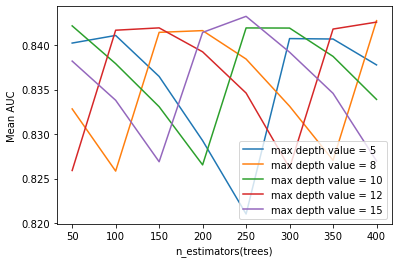

In [42]:
def rf_plot(aucs,ns,ds):
    for i in range(len(ds)):
        plt.plot(ns,aucs[len(ns)*i : len(ns)*i +len(ns)],
                label="max depth value = "+ str(ds[i]))
    plt.xlabel("n_estimators(trees)")
    plt.ylabel("Mean AUC")
    plt.legend()
rf_plot(mean_aucs, ns, depths)    

In [43]:
#final predict
clf = RandomForestClassifier(n_estimators=350, max_depth= 8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

feat_imp = clf.feature_importances_
fpr, tpr, threshold = metrics.roc_curve(y_test,y_proba)

acc = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_proba)
cm = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy score is:", acc)
print("AUC score is:", auc)

Accuracy score is: 0.7879791765262659
AUC score is: 0.8481924707055597


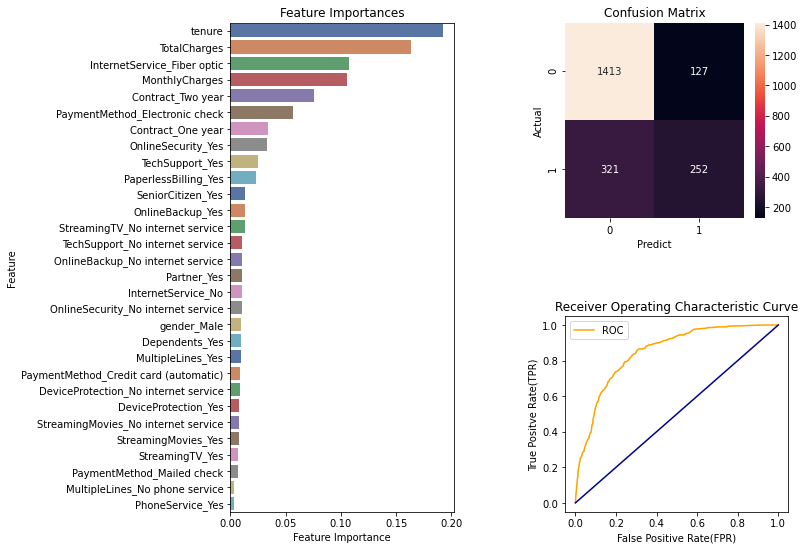

In [44]:
feat_imp_df = pd.DataFrame({"Feature":X_train.columns,
                        "Feature Importance":feat_imp}).sort_values("Feature Importance",ascending = False)

fig = plt.figure(figsize = (10,9))
gs = plt.GridSpec(2, 2, hspace = 0.5, wspace = 0.5)

ax1 = plt.subplot(gs[:,0])
sns.barplot(x="Feature Importance",y="Feature", data = feat_imp_df,palette ="deep")
ax1.set(title = "Feature Importances")

ax2 = plt.subplot(gs[0,1])
sns.heatmap(data = cm, annot = True, fmt = "d")
ax2.set(title="Confusion Matrix",
       xlabel = "Predict",ylabel = "Actual")
ax3 = plt.subplot(gs[1,1])
sns.lineplot(fpr,tpr,color = "orange",label = "ROC")
sns.lineplot([0,1],[0,1],color = "darkblue", linestyle= "--")
ax3.set(title  = "Receiver Operating Characteristic Curve",
       xlabel = "False Positive Rate(FPR)",
       ylabel = "True Positve Rate(TPR)")
plt.show()

### 4.2.3 Adaboost

In [45]:
def ada_model(X_train_cv, y_train_cv, X_val, y_val, n =100):
    #Instantiate a Decision Stump
    dt_stump = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)   
    clf = AdaBoostClassifier(base_estimator= dt_stump,n_estimators = n)
    clf.fit(X_train_cv, y_train_cv)
    y_val_pred = clf.predict(X_val)
    y_val_test = clf.predict_proba(X_val)[:,1]
    auc = metrics.roc_auc_score(y_val, y_val_pred)
    return auc

def ada_cv(X_train,y_train,ns, cv = 3):
    aucs = {}
    kf = KFold(n_splits = cv)
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

        for n in ns:
            auc = ada_model(X_train_cv,y_train_cv,X_val,y_val, n = n)
            key = n
            if key not in aucs:
                aucs[key]= []
                aucs[key].append(auc)
            else:
                aucs[key].append(auc)
    return aucs

In [46]:
alphas = [1]
ns = [50,100,150,200]
aucs = ada_cv(X_train,y_train, ns = ns)
aucs

{50: [0.7378534478241013, 0.709056922103568, 0.7024675855624343],
 100: [0.7326897594645785, 0.7008435744550318, 0.710055289491103],
 150: [0.7316996938095631, 0.6967953756782146, 0.7083839504730756],
 200: [0.7305786175763792, 0.6967953756782146, 0.7080111357707433]}

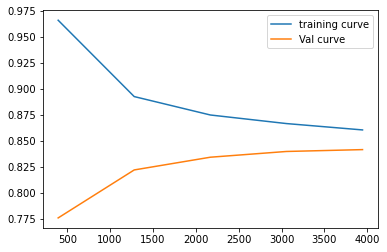

In [72]:
from sklearn.model_selection import learning_curve
dt_stump = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)   
clf = AdaBoostClassifier(base_estimator= dt_stump,n_estimators = 50)
train_sizes, train_scores, valid_scores = learning_curve(clf,X_train,y_train, cv = 5, scoring = "roc_auc")
plt.plot(train_sizes, np.mean(train_scores,axis = 1),label = "training curve")
plt.plot(train_sizes, np.mean(valid_scores, axis = 1),label = "val curve")
plt.xlabel = "training samples"
plt.ylabel = "AUC score"
plt.legend()

In [70]:
#final predict
dt_stump = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)   
clf = AdaBoostClassifier(base_estimator= dt_stump,n_estimators = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

acc = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_proba)
cm = metrics.confusion_matrix(y_test, y_pred)
feat_imp = clf.feature_importances_
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)
print("Accuracy score:",acc)
print("AUC score:", auc)

Accuracy score: 0.7917652626597255
AUC score: 0.8437750730944448


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve')]

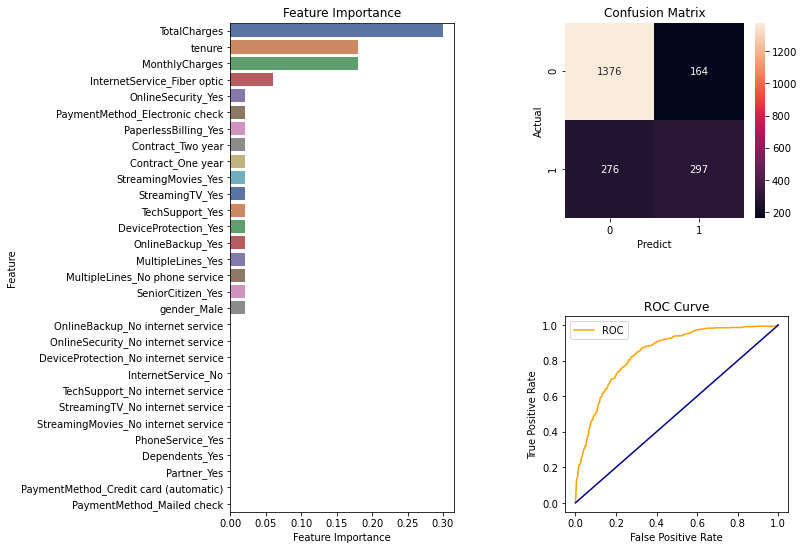

In [74]:
feat_imp_df = pd.DataFrame({"Feature":X_train.columns,
                          "Feature Importance":feat_imp}).sort_values("Feature Importance", ascending = False)
gs = plt.GridSpec(2,2,wspace = 0.5, hspace = 0.5)
plt.figure(figsize = (10,9))
ax1 = plt.subplot(gs[:,0])
sns.barplot(y = "Feature" ,x = "Feature Importance",data = feat_imp_df,palette ="deep")
ax1.set(title = "Feature Importance")
ax2 = plt.subplot(gs[0,1])
sns.heatmap(data =cm, annot = True, fmt = "d")
ax2.set(title = "Confusion Matrix", xlabel = "Predict", ylabel = "Actual")
ax3 = plt.subplot(gs[1,1])
sns.lineplot(fpr,tpr,color = "orange",label = "ROC")
sns.lineplot([0,1],[0,1], color = "darkblue", linestyle = "--")
ax3.set(title = "ROC Curve", xlabel = "False Positive Rate", ylabel = "True Positive Rate")

### 4.2.4 Gradient Boosting

In [34]:
def gb_model(X_train_cv,y_train_cv, X_val, y_val, lf, sp):
    clf = GradientBoostingClassifier(min_samples_leaf= lf, min_samples_split= sp)
    clf.fit(X_train_cv,y_train_cv)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:,1]
    acc = metrics.accuracy_score(y_val,y_val_pred)
    auc = metrics.roc_auc_score(y_val, y_val_proba)
    return auc

In [35]:
def gb_cv(X_train,y_train,leafs,splits,cv = 5):
    aucs = {}
    kf = KFold(n_splits= cv)
    for train_idx,val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx,:], y_train.iloc[val_idx]
        for sp in splits:
            for lf in leafs:
                auc = gb_model(X_train_cv,y_train_cv, X_val, y_val, sp = sp, lf = lf)
                key = str(sp)+"&"+str(lf)
                if key not in aucs:
                    aucs[key] = []
                    aucs[key].append(auc)
                else:
                    aucs[key].append(auc)
    return aucs                   

In [36]:
leafs = np.geomspace(10,1500, num=8, dtype=int)
splits = np.geomspace(5,750, num = 6, dtype = int)
aucs =  gb_cv(X_train,y_train,leafs,splits)

In [37]:
def gb_get_mean_auc(aucs):
    mean_aucs = []
    best_auc = 0
    best_params = None
    for key in aucs:
        mean_auc = np.mean(aucs[key])
        mean_aucs.append(mean_auc)
        if best_auc < mean_auc:
            best_auc = mean_auc
            best_params = key
    sp, lf =  list(map(int,best_params.split("&")))
    return sp,lf,best_auc, mean_aucs

*best_param, best_auc, mean_aucs = gb_get_mean_auc(aucs)
print("min_samples_split:{}    min_samples_leaf:{}".format(*best_param))
print("Best AUC is", best_auc)

min_samples_split:750    min_samples_leaf:358
Best AUC is 0.8452591973101272


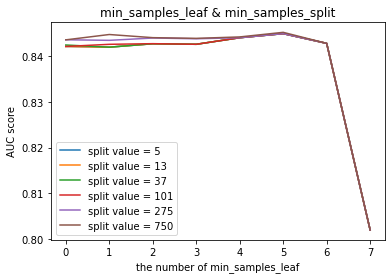

In [38]:
def gb_plot(leafs,splits,mean_aucs):
    for i in range(len(splits)):
        plt.plot(mean_aucs[len(leafs)*i :len(leafs)*i + len(leafs)], label = "split value = "+str(splits[i]))
    plt.legend()
    plt.title("min_samples_leaf & min_samples_split")
    plt.xlabel("the number of min_samples_leaf")
    plt.ylabel("AUC score")
gb_plot(leafs,splits,mean_aucs)

In [39]:
#final prediction
clf = GradientBoostingClassifier(min_samples_split = 750, min_samples_leaf = 358)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
feat_imp = clf.feature_importances_
#indicators
acc = metrics.accuracy_score(y_test,y_pred)
auc = metrics.roc_auc_score(y_test, y_proba)
cm = metrics.confusion_matrix(y_test,y_pred)

fpr,tpr,threshold = metrics.roc_curve(y_test,y_proba)

feat_imp_df = pd.DataFrame({"Feature":X_train.columns,
                           "Feature Importance":feat_imp}).sort_values("Feature Importance",ascending =False)
print("ACC score:", acc)
print("AUC score:", auc)

ACC score: 0.7993374349266446
AUC score: 0.8495512341062079


In [40]:
print(threshold.shape)
print(y_test.shape)

(671,)
(2113,)


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve')]

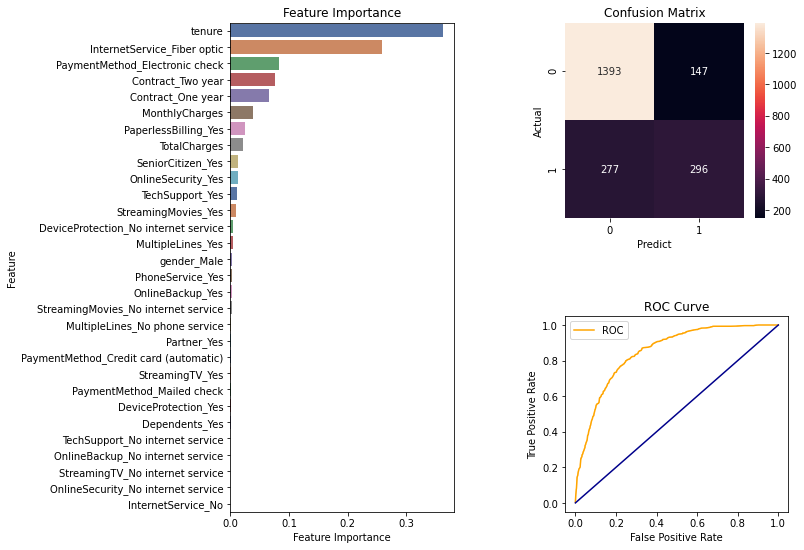

In [41]:
plt.figure(figsize = (10,9))
gs = plt.GridSpec(2,2, wspace = 0.5, hspace = 0.5)
ax1 = plt.subplot(gs[:,0])
sns.barplot(x = "Feature Importance", y= "Feature", data = feat_imp_df, palette = "deep")
ax1.set(title = "Feature Importance")

ax2 = plt.subplot(gs[0,1])
sns.heatmap(data = cm, annot = True, fmt = "d")
ax2.set(xlabel = "Predict", ylabel="Actual", title = "Confusion Matrix")

ax3 = plt.subplot(gs[1,1])
sns.lineplot(fpr,tpr,label = "ROC",color = "orange")
sns.lineplot([0,1],[0,1],color = "darkblue")
ax3.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate",title = "ROC Curve")

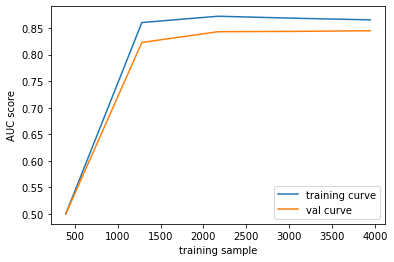

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
clf = GradientBoostingClassifier(min_samples_split = 750, min_samples_leaf = 358)
train_size, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv = 5, scoring = "roc_auc")

plt.plot(train_size, np.mean(train_scores, axis = 1), label = "training curve")
plt.plot(train_size, np.mean(val_scores, axis = 1), label = "val curve")
plt.xlabel("training sample")
plt.ylabel("AUC score")
plt.legend() 